<a href="https://colab.research.google.com/github/RAJESHVELAMALA/Project3/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
!pip install tensorflow_hub

In [86]:
#Import Os and Basis Libraries
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#Kernel Intilizer
from sklearn.preprocessing import LabelEncoder
# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam , Adamax
#PreTrained Model
from tensorflow.keras.applications import *
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Correct import for ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Warnings Remove
import warnings
import tensorflow_hub as hub
warnings.filterwarnings("ignore")

import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping



# paellet
palette = ["#606060FF", "#D6ED17FF"]

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#from google.colab import files
#files.upload()


In [4]:
#!unzip /content/sample_data/fast-food-classification-dataset/Train/foodclassification.zip -d /content/drive/MyDrive/fast-food-classification-dataset/

In [89]:
# Load Data and Make DataFrame
def L_Data(directory):
    filepath =[]
    label = []

    folds = os.listdir(directory)

    for fold in folds:
        f_path = os.path.join(directory , fold)

        imgs = os.listdir(f_path)

        for img in imgs:

            img_path = os.path.join(f_path , img)
            filepath.append(img_path)
            label.append(fold)

    #Concat data paths with labels
    file_path_series = pd.Series(filepath , name= 'filepath')
    Label_path_series = pd.Series(label , name = 'label')
    df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

    return df_train

# # Directory containing the "Train" folder
directory_T = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train"
# Directory containing the "Train" folder
directory_TE = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Test"
directory_VAL = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Valid"
# Train Data and Test Data
tr_d = L_Data(directory_T)
te_d = L_Data(directory_TE)

In [90]:
# Shape
print(f"The shape of The Train data is: {tr_d.shape}")
print(f"The shape of The Test data is: {te_d.shape}")

The shape of The Train data is: (14993, 2)
The shape of The Test data is: (1500, 2)


In [91]:
#Data_Dir Train And Test
test_dir = directory_TE
data_dir = "/content/drive/MyDrive/fast-food-classification-dataset/train_dataset"

# Image Size
IMAGE_SIZE = (256, 256)

print('Training Images:')
# creating the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory_T,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

#Testing Augmented Data
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory_T,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

# Create an ImageDataGenerator instance without augmentation
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load test data using ImageDataGenerator
test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False ,
)

Training Images:
Found 14991 files belonging to 10 classes.
Using 11993 files for training.
Validation Images:
Found 14991 files belonging to 10 classes.
Using 2998 files for validation.
Found 1500 images belonging to 10 classes.


In [92]:
# Normalizing Pixel Values
# Train Data
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
# Val Data
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))

In [93]:
# Show COunt Function
def Count_S(df, palette):
    # Count the occurrences of each category in the 'label' column
    count = df['label'].value_counts()

    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(20, 6), facecolor='white')

    # Plot pie chart on the first subplot
    sns.set_palette(palette)
    axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
    axs[0].set_title('Distribution of Categories')

    # Plot bar chart on the second subplot
    sns.barplot(x=count.index, y=count.values, ax=axs[1], palette=palette)
    axs[1].set_title('Count of Categories')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Define your custom palette
custom_palette = palette

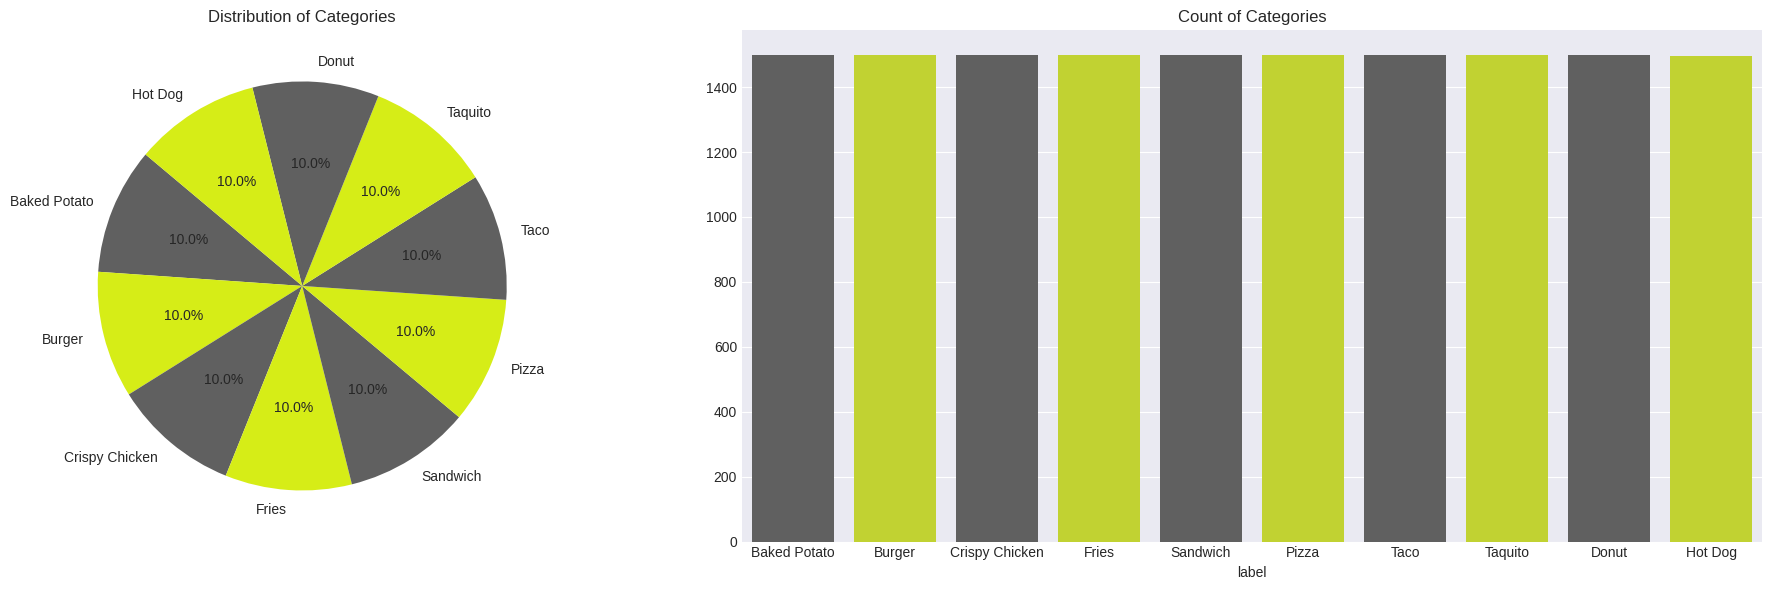

In [94]:
# Train Count
Count_S(tr_d, custom_palette)

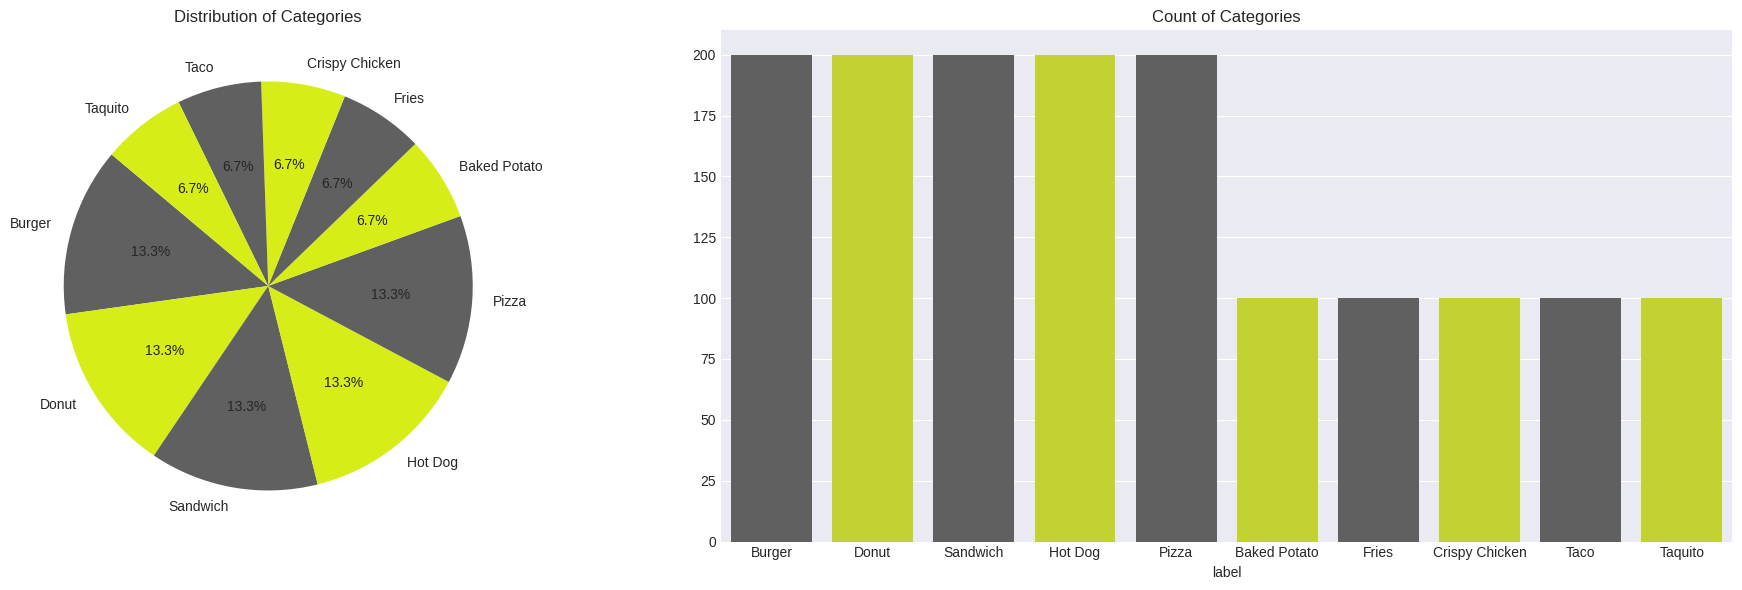

In [95]:
# Test Count
Count_S(te_d, custom_palette)

In [96]:
def visualize_images(path, num_images=5):
    # Get a list of image filenames in the specified path
    image_filenames = os.listdir(path)

    # Limit the number of images to visualize if there are more than num_images
    num_images = min(num_images, len(image_filenames))

    # Create a figure and axis object to display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='white')

    # Iterate over the selected images and display them
    for i, image_filename in enumerate(image_filenames[:num_images]):
        # Load the image using Matplotlib
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)

        # Display the image
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

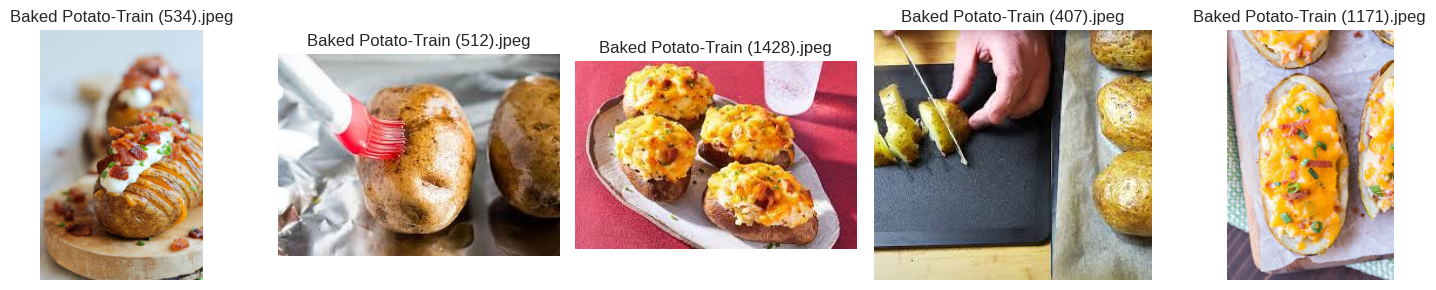

In [97]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Baked Potato"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

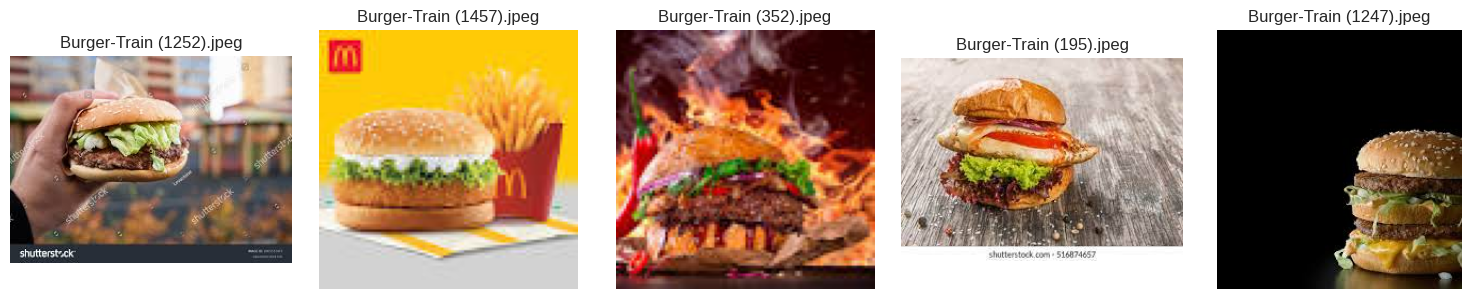

In [98]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Burger"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

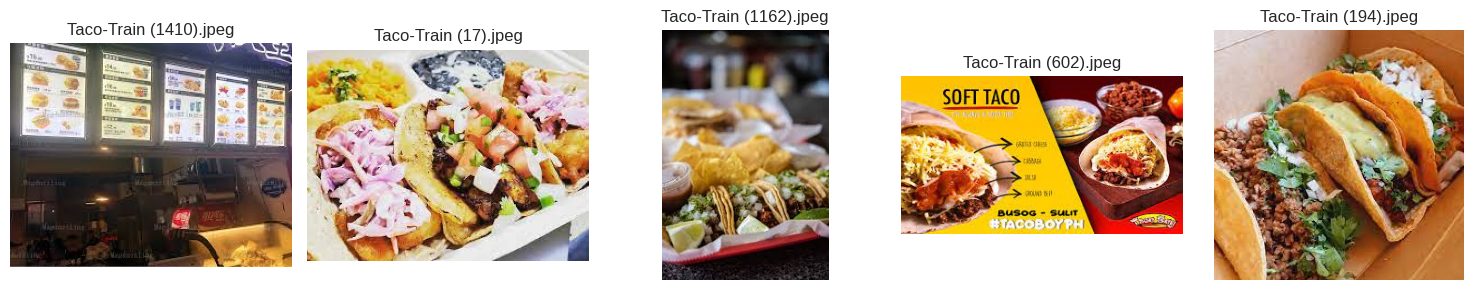

In [99]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Taco"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

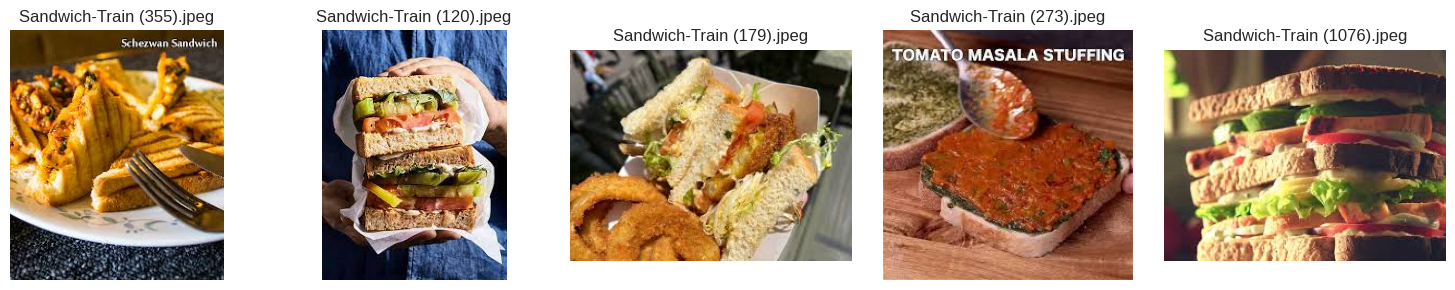

In [100]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Sandwich"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

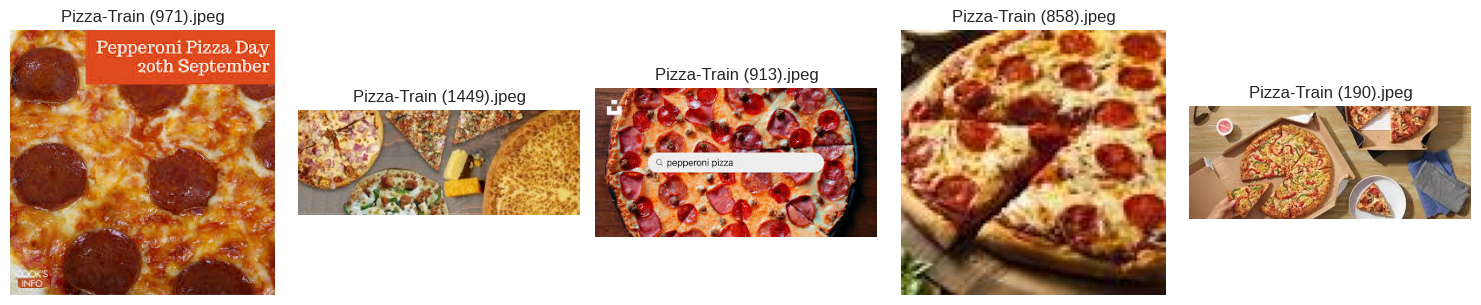

In [101]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Pizza"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

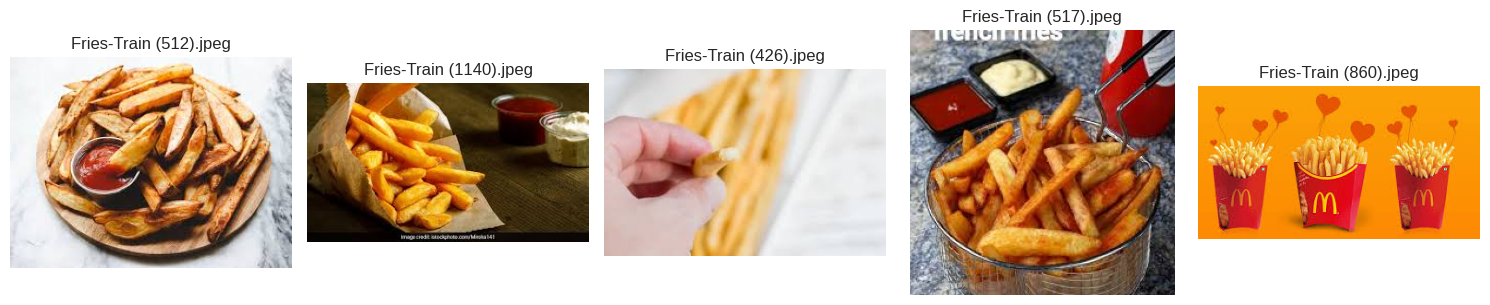

In [102]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Fries"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

In [103]:
# Define the URL of the model
url = "https://tfhub.dev/google/bit/m-r50x1/1"


local_url = "/content/drive/MyDrive/fast-food-classification-dataset/MyModel"

# Load the model from the URL
model_E = hub.KerasLayer(url)

# Set the model to be non-trainable
model_E.trainable = False

In [114]:
import tensorflow_hub as hub

def createModel1(model_E, EPO):
    # Define the name for your model
    model_name = "FoodClassificationModel"

    hub_layer = hub.KerasLayer(model_E, trainable=False)


    # Create a functional model instead of Sequential
    inputs = keras.Input(shape=(256, 256, 3))  # Assuming your input shape

    # Preprocess the input for the TensorFlow Hub model if necessary
    x = tf.keras.applications.resnet50.preprocess_input(inputs)

    x=hub_layer(x)

    # Wrap the TensorFlow Hub model in a Lambda layer to handle symbolic inputs
    #x = Lambda(lambda x: model_E(x))(x)  # Pass inputs through the KerasLayer

    # Give the BatchNormalization layer a custom, valid name
    x = BatchNormalization(name='batch_norm_layer')(x)  # Change the layer name here
    x = Dropout(0.2)(x)
    outputs = Dense(10, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name=model_name)

    # Compile
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Print model summary
    print(model.summary())

    # Early_Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Fitting Model - Use model.fit() instead of model.fit_generator()
    history = model.fit(train_ds,
                        epochs=EPO,
                        validation_data=validation_ds,
                        callbacks=early_stopping)

    return history,model



In [126]:
#history = M_B(model_E, 6)
history,model = createModel1(model_E, 6)

Model: "FoodClassificationModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 tf.__operators__.getitem_1  (None, 256, 256, 3)       0         
 0 (SlicingOpLambda)                                             
                                                                 
 tf.nn.bias_add_10 (TFOpLam  (None, 256, 256, 3)       0         
 bda)                                                            
                                                                 
 keras_layer_5 (KerasLayer)  (None, 2048)              23500352  
                                                                 
 batch_norm_layer (BatchNor  (None, 2048)              8192      
 malization)                                                     
                                           

In [127]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

94/94 [==============================] - 132s 1s/step - loss: 2.0064 - accuracy: 0.3339
Validation Loss: 2.006439208984375
Validation Accuracy: 0.3338892459869385


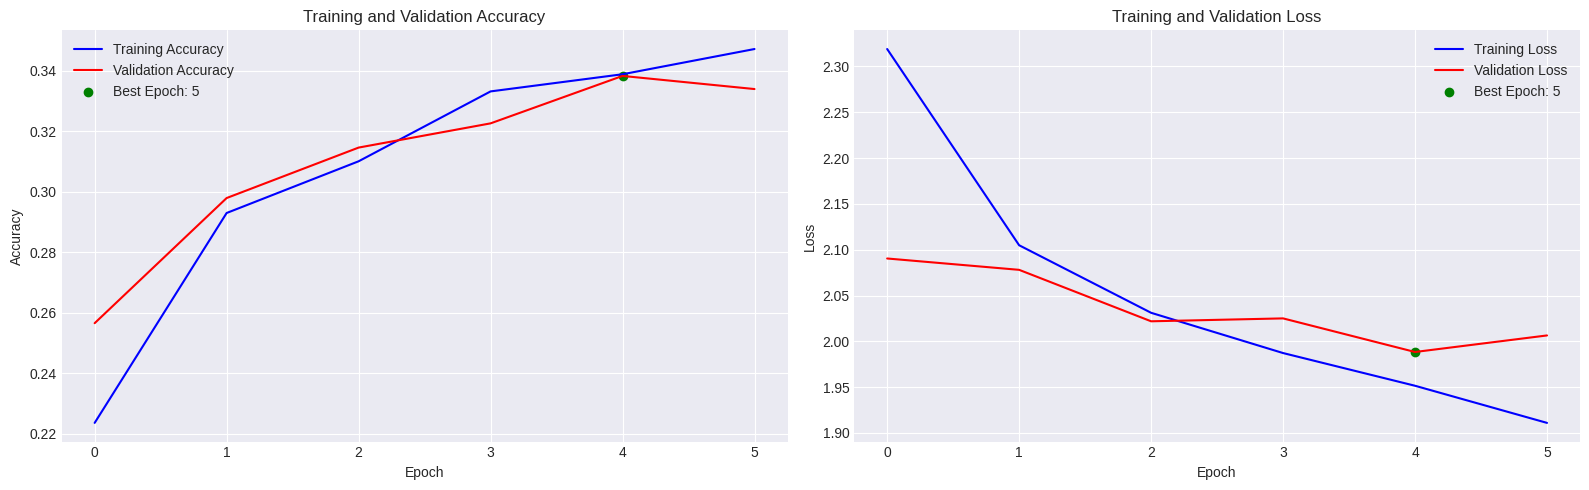

In [128]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('seaborn-darkgrid')

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [129]:
# Save the entire model
#model.save("/content/drive/MyDrive/fast-food-classification-dataset/MyModel/food_imageprocessing_model.h5")

#!pip install tensorflow

#import tensorflow as tf

# Save the entire model using the SavedModel format
model.save("/content/drive/MyDrive/fast-food-classification-dataset/MyModel/food_imageprocessing_model", save_format='tf')

In [130]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Load and preprocess the image
image_path ='/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Fries/Fries-Train (1).jpeg'
#image_path ='/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Donut/Donut (1).jpeg'
#image_path = '/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Burger/Burger-Train (100).jpeg'

image = Image.open(image_path)
image = image.resize((256, 256))
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array = image_array /  255.0

# Load the trained model
food_model = load_model('/content/drive/MyDrive/fast-food-classification-dataset/MyModel/food_imageprocessing_model')
#class_labels = filenames_df['foodName'].tolist()

# Make a prediction
predictions = food_model.predict(image_array)
predicted_class = np.argmax(predictions, axis=1)
print(predicted_class)

class_labels = tr_d['label'].unique().tolist()

print(class_labels[predicted_class[0]])

print(predicted_class[0])


1/1 [==============================] - 2s 2s/step
[4]
Fries
4
